![image.png](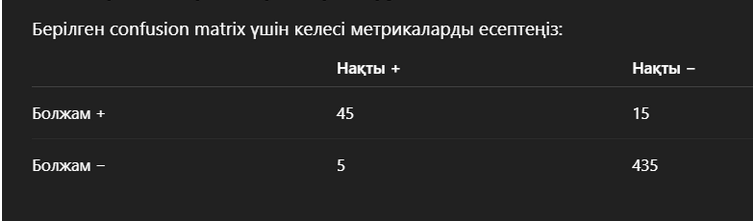)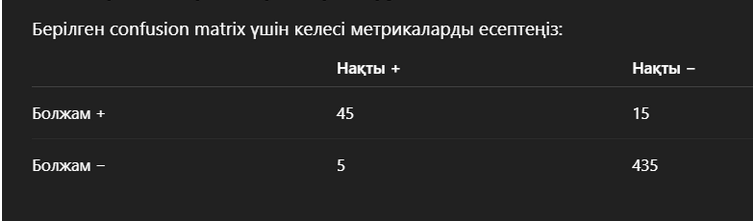

TP = 45
FP = 15
FN = 5
TN = 435

Total = 45 + 15 + 5 + 435 = 500

Accuracy = (TP + TN)/(Total) = (45 + 435)/500 = 0.96

Precision = TP/(TP + FP) = 45/45 + 15 = 0.75

Recall = TP/(TP + FN) = 45/(45 + 5) = 0.9

F1 score = 2 * (Precision * Recall)/(Precision + Recall) = 2 * (0.75 * 0.9)/(0.9 + 0.75) = 0.818

F1 score, Precision, Recall

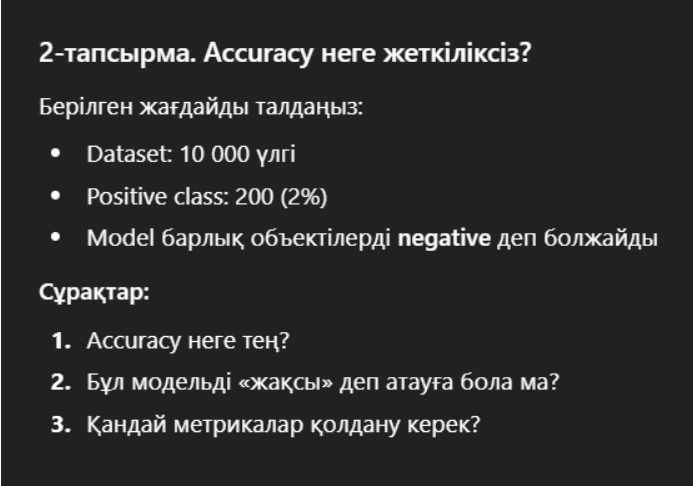

Accuracy = (9800)/(9800 + 200) = 0.98

жоқ, өйткені позитив класс 0ге тең.

Recall, precision, f1 score

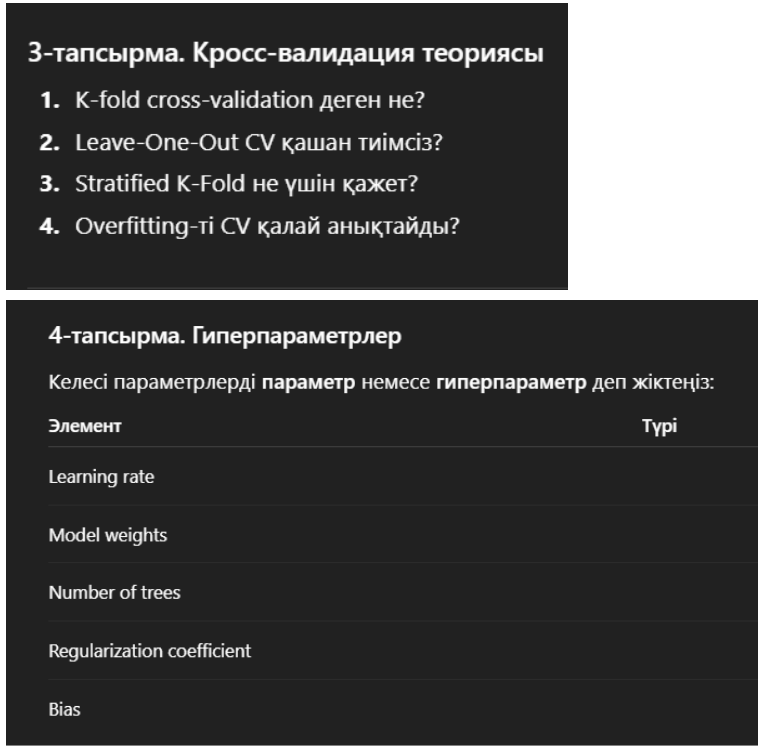

1. Что такое K-fold cross-validation?

K-fold кросс-валидация (перекрестная проверка по K блокам) — это метод оценки модели, при котором обучающая выборка разбивается на K равных частей (фолдов).

Как это работает (пошагово):

    Данные делятся на K частей (обычно 5 или 10).

    Модель обучается K раз.

    На каждой итерации одна часть используется как тестовая (валидационная), а остальные K−1 частей — как обучающая.

    В итоге мы получаем K оценок качества.

    Итоговая метрика — это среднее значение всех полученных оценок.

2. Когда Leave-One-Out CV (LOOCV) неэффективен?

Leave-One-Out CV — это предельный случай K-fold, где K равно количеству всех примеров в данных (N). То есть каждый раз мы учимся на всех данных, кроме одного примера.

Когда это неэффективно:

    Большие данные: Если у вас 100 000 строк данных, модели придется обучиться 100 000 раз. Это вычислительно очень дорого и долго.

    Влияние выбросов: LOOCV имеет высокую дисперсию (variance). Оценка качества может сильно колебаться из-за специфических одиночных выбросов.

3. Для чего нужен Stratified K-Fold?

Обычный K-Fold делит данные случайно. Stratified (Стратифицированный) K-Fold сохраняет процентное соотношение классов в каждом блоке.

Зачем нужен:

    Это критически важно для несбалансированных данных .

    Пример: Если у вас всего 2% больных, обычное разбиение может случайно создать тестовый блок, где больных нет вообще (0%). Stratified гарантирует, что в каждом блоке будет ровно 2% больных.

4. Как с помощью CV определить Overfitting (переобучение)?

Переобучение определяется путем сравнения метрик на обучающей части (Train score) и на валидационной части (Validation score) внутри кросс-валидации.

    Норма: Ошибки на Train и Validation примерно одинаковы и низки.

    Overfitting: Ошибка на Train очень низкая (модель "вызубрила" данные), а ошибка на Validation высокая (модель не умеет обобщать).

        Пример: Accuracy Train = 99%, Accuracy Validation = 75%.

1. Основная идея алгоритма SMOTE

Вместо того чтобы просто дублировать существующие записи (как в обычном oversampling), SMOTE создает новые искусственные (синтетические) данные.

    Алгоритм берет точку миноритарного класса.

    Находит ее ближайших соседей (k-nearest neighbors) из того же класса.

    Строит "мостик" (линию) между точкой и соседом и ставит новую точку где-то на этой линии.

2. Какова формула?

Новая точка x_new = x_i + lambda * (x_neighbour - x_i)

Где:

    xi​ — исходная точка миноритарного класса.

    xneighbor​ — один из ее ближайших соседей.

    λ — случайное число от 0 до 1 (определяет, где именно на отрезке будет новая точка).

3. В каком случае SMOTE опасен?

    Пересечение классов (Overlapping): Если классы сильно перемешаны, SMOTE может создать точки в "шумных" зонах, усложняя разделение.

    Выбросы (Outliers): Если SMOTE выберет в качестве "базы" выброс (ошибочную точку), он создаст целую группу искусственных выбросов, что запутает модель.

4. Можно ли применять SMOTE к train и test одновременно?

КАТЕГОРИЧЕСКИ НЕТ.

    Только на Train: SMOTE (и любые методы балансировки) применяются только к обучающей выборке после разделения данных.

    Почему? Тестовая выборка (Test) должна отражать реальный мир. Если вы добавите туда синтетические данные, вы будете проверять модель на выдуманных примерах, что сделает оценку качества (метрики) ложной и завышенной. Кроме того, это приведет к утечке данных (Data Leakage).

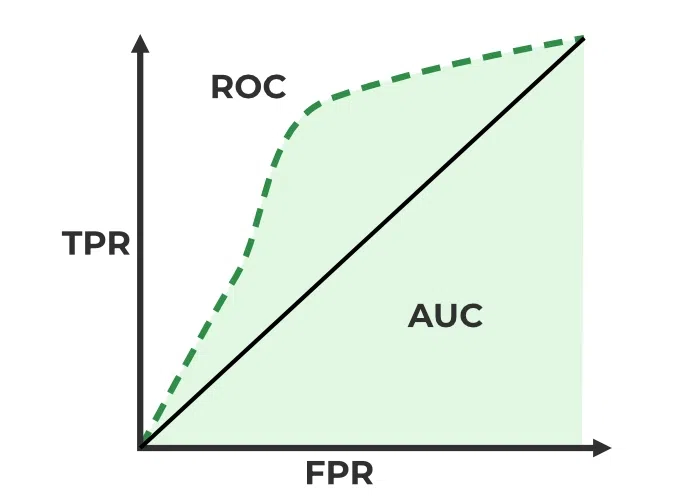

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.datasets import make_classification

In [19]:
X, y = make_classification(n_samples=10000, n_features=20, n_classes=2,
                           weights=[0.98, 0.02], random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [20]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [21]:
acc = accuracy_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {acc:.4f}")
print(f"Recall:   {rec:.4f}")
print(f"F1-score: {f1:.4f}")

print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9770
Recall:   0.1020
F1-score: 0.1786
[[1949    2]
 [  44    5]]


In [22]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score

In [23]:
model_base = LogisticRegression(random_state=42)
model_base.fit(X_train, y_train)
y_pred_base = model_base.predict(X_test)

In [24]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

model_smote = LogisticRegression(random_state=42)
model_smote.fit(X_train_res, y_train_res)
y_pred_smote = model_smote.predict(X_test)

In [25]:
rec_base = recall_score(y_test, y_pred_base)
roc_base = roc_auc_score(y_test, y_pred_base)

rec_smote = recall_score(y_test, y_pred_smote)
roc_smote = roc_auc_score(y_test, y_pred_smote)

print("\n--- Результаты ---")
print(f"Без SMOTE -> Recall: {rec_base:.4f} | ROC-AUC: {roc_base:.4f}")
print(f"С SMOTE   -> Recall: {rec_smote:.4f} | ROC-AUC: {roc_smote:.4f}")


--- Результаты ---
Без SMOTE -> Recall: 0.1020 | ROC-AUC: 0.5505
С SMOTE   -> Recall: 0.7143 | ROC-AUC: 0.7772


In [26]:
model_none = LogisticRegression(class_weight=None, random_state=42)
model_none.fit(X_train, y_train)
y_pred_none = model_none.predict(X_test)
f1_none = f1_score(y_test, y_pred_none)

model_balanced = LogisticRegression(class_weight='balanced', random_state=42)
model_balanced.fit(X_train, y_train)
y_pred_balanced = model_balanced.predict(X_test)
f1_balanced = f1_score(y_test, y_pred_balanced)

print(f"F1 (None):     {f1_none:.4f}")
print(f"F1 (Balanced): {f1_balanced:.4f}")

F1 (None):     0.1786
F1 (Balanced): 0.1777


In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2']
}

model = LogisticRegression(solver='liblinear', random_state=42)

In [28]:
grid_f1 = GridSearchCV(model, param_grid, scoring='f1', cv=5)
grid_f1.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=42, solver='liblinear'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2']},
             scoring='f1')

In [29]:
grid_roc = GridSearchCV(model, param_grid, scoring='roc_auc', cv=5)
grid_roc.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=42, solver='liblinear'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2']},
             scoring='roc_auc')

In [30]:
print("Лучшие параметры (по F1):", grid_f1.best_params_)
print("Лучший F1-score:", grid_f1.best_score_)

print("\nЛучшие параметры (по ROC-AUC):", grid_roc.best_params_)
print("Лучший ROC-AUC:", grid_roc.best_score_)

Лучшие параметры (по F1): {'C': 0.01, 'penalty': 'l2'}
Лучший F1-score: 0.15680836770451714

Лучшие параметры (по ROC-AUC): {'C': 0.01, 'penalty': 'l2'}
Лучший ROC-AUC: 0.8592089503239434


In [31]:
from sklearn.model_selection import cross_val_score
import numpy as np

model = LogisticRegression(random_state=42, solver='liblinear')

scores_3 = cross_val_score(model, X, y, cv=3, scoring='f1')
mean_3 = scores_3.mean()
std_3 = scores_3.std()

scores_10 = cross_val_score(model, X, y, cv=10, scoring='f1')
mean_10 = scores_10.mean()
std_10 = scores_10.std()

print(f"3-Fold F1: Mean = {mean_3:.4f}, Std (Variance) = {std_3:.4f}")
print(f"10-Fold F1: Mean = {mean_10:.4f}, Std (Variance) = {std_10:.4f}")

3-Fold F1: Mean = 0.1933, Std (Variance) = 0.0285
10-Fold F1: Mean = 0.1972, Std (Variance) = 0.0597
